In [1]:
# !pip install rasa

In [3]:
import spacy

KeyboardInterrupt: 

In [5]:
import rasa

In [1]:
import spacy
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [2]:
train = pd.read_csv(r'C:\Users\I324158\Downloads\train\train.csv')

In [3]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
train["text"][0]

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [5]:
train.author.isnull().sum()

0

In [6]:
train["author"].head(20)

0     EAP
1     HPL
2     EAP
3     MWS
4     HPL
5     MWS
6     EAP
7     EAP
8     EAP
9     MWS
10    MWS
11    EAP
12    HPL
13    HPL
14    EAP
15    MWS
16    EAP
17    MWS
18    EAP
19    HPL
Name: author, dtype: object

In [7]:
train["split_text"] = train["text"].apply(lambda x:x.split())

In [8]:
train["word_count"] = train["split_text"].apply(lambda x:len(x))

In [9]:
train["word_count"].describe()

count    19579.000000
mean        26.730477
std         19.048353
min          2.000000
25%         15.000000
50%         23.000000
75%         34.000000
max        861.000000
Name: word_count, dtype: float64

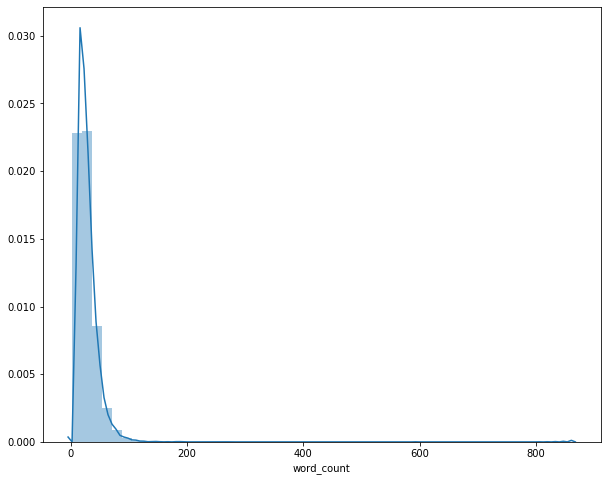

In [10]:
plt.figure(figsize=(10,8))
sns.distplot(train["word_count"],)
plt.show()

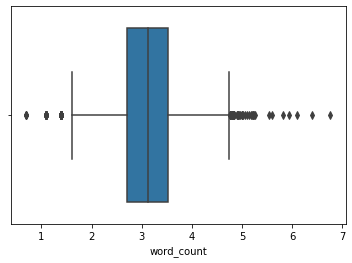

In [11]:
sns.boxplot(np.log(train["word_count"]))

In [1]:
train.loc[train["word_count"]<=4, ["text","author"]].head()

NameError: name 'train' is not defined

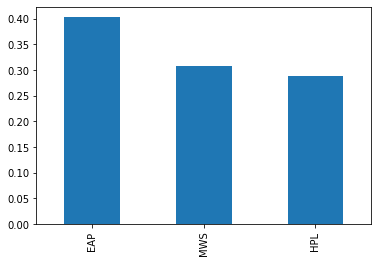

In [13]:
train["author"].value_counts(normalize=True).plot.bar()

In [14]:
nlp = spacy.load("en_core_web_sm")

train = train[:50]

In [15]:
train["spacy_doc"] = train["text"].apply(lambda x:nlp(x))
my_text = """The economic situation of the country is on edge , as the stock 
market crashed causing loss of millions. Citizens who had their main investment 
in the share-market are facing a great loss. Many companies might lay off 
thousands of people to reduce labor cost"""

In [16]:
train["clean_text"] = train["spacy_doc"].apply(lambda x: [i.text for i in x if i.is_stop!=True and i.is_punct!=True])
train["clean_text"][0]

['process',
 'afforded',
 'means',
 'ascertaining',
 'dimensions',
 'dungeon',
 'circuit',
 'return',
 'point',
 'set',
 'aware',
 'fact',
 'perfectly',
 'uniform',
 'wall']

In [17]:
train["lemma_text"] = train["spacy_doc"].apply(lambda x: [i.lemma_ for i in x if i.is_stop!=True and i.is_punct!=True])

In [18]:
train.head()

,id,text,author,split_text,word_count,spacy_doc,clean_text,lemma_text
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process,, however,, afforded, me, no, m...",41,"(This, process, ,, however, ,, afforded, me, n...","[process, afforded, means, ascertaining, dimen...","[process, afford, means, ascertain, dimension,..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,...",14,"(It, never, once, occurred, to, me, that, the,...","[occurred, fumbling, mere, mistake]","[occur, fumbling, mere, mistake]"
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box...",36,"(In, his, left, hand, was, a, gold, snuff, box...","[left, hand, gold, snuff, box, capered, hill, ...","[left, hand, gold, snuff, box, caper, hill, cu..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from...",34,"(How, lovely, is, spring, As, we, looked, from...","[lovely, spring, looked, Windsor, Terrace, six...","[lovely, spring, look, Windsor, Terrace, sixte..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else,, not, even, gold,, th...",27,"(Finding, nothing, else, ,, not, even, gold, ,...","[Finding, gold, Superintendent, abandoned, att...","[find, gold, Superintendent, abandon, attempt,..."


In [19]:
def calc_hash(x):
    l1 = list()
    for i in x:
        l1.append(nlp.vocab.strings[i])
    return l1
train["hash_value"] = train["lemma_text"].apply(calc_hash)

In [1]:
import re
re.findall("siku?", "sikuaimain")
# a = re.finditer("ai","sikuaimain")

['siku']

In [2]:
print(re.search("spain$","The rain in spain"))

<re.Match object; span=(12, 17), match='spain'>


In [3]:
re.search("\d\d*","soumyaiter13@gmail123siku")

<re.Match object; span=(10, 12), match='13'>

- findall(reg,txt)
- search(reg,txt) - match 1st instance of string and returns match object
- split(reg,txt)
- sub(oldstring,newstring,txt) -  substitute old with new 
- finditer(reg,txt)
- re.compile(pattern)<br>
- re.match(reg,txt) - Matches only at the begining 

`
a = re.compile("a")
a.search("abcb")
<re.Match object; span=(0, 1), match='a'> `


`
a.match("abcd")
<re.Match object; span=(0, 1), match='a'> `

`pattern = re.compile("d")
pattern.search("dog")
pattern.match()|findall()|finditer() etc.also works ` 

`
match.group(0)
match.groups()
match.start()
match.end()
match.span() # (0,2) `

`
^ - start of a string ^abc
$ - end of a string  siku$
. - matches any char 
\  escape sequence
A|B  - or 
+ -  matches the expression to its left 1 or more times `


In [4]:
a = re.compile("a")
a.search("abcb")


<re.Match object; span=(0, 1), match='a'>

In [5]:
a.match("abcd")

<re.Match object; span=(0, 1), match='a'>

In [6]:
p1 = re.compile("so")
m1=p1.search("so it is very hot.we are so so lucky to have you")
m1.group(0)

'so'

In [7]:
m1.span()

(0, 2)

In [32]:
a = re.search("is","siku is a bad boy")

In [33]:
a

<re.Match object; span=(5, 7), match='is'>

In [34]:
a.group()

'is'

In [38]:
re.search("101*0*", "101100")

<re.Match object; span=(0, 6), match='101100'>

In [43]:
re.findall(r'ab{3,}?', 'abbbbbbbbb')

['abbb']

In [2]:
from nltk import regexp_tokenize

In [7]:
from nltk import regexp_tokenize
sent = "So excited to be a part of machine learning and artificial intelligence program made by @upgrad and @iiitb"
pattern = "@[\w]*"
regexp_tokenize(sent,pattern)

['@upgrad', '@iiitb']

In [16]:
from nltk import TweetTokenizer
tokenizer = TweetTokenizer()
tokens.tokenize(sent)

['So',
 'excited',
 'to',
 'be',
 'a',
 'part',
 'of',
 'machine',
 'learning',
 'and',
 'artificial',
 'intelligence',
 'program',
 'made',
 'by',
 '@upgrad',
 'and',
 '@iiitb']

In [24]:
Doc1= "there was a place on my ankle that was itching"
Doc2 = "but I did not scratch it"
Doc3="and then my ear began to itch"
Doc4 = "and next my back"

l1 = Doc1.split()


In [25]:
l1.extend(Doc2.split())
l1.extend(Doc3.split())
l1.extend(Doc4.split())

In [32]:
len(l1)

27

In [34]:
finaldoc = [Doc1,Doc2,Doc3,Doc4]

In [35]:
from collections import Counter

In [36]:
Counter(l1)

Counter({'there': 1,
         'was': 2,
         'a': 1,
         'place': 1,
         'on': 1,
         'my': 3,
         'ankle': 1,
         'that': 1,
         'itching': 1,
         'but': 1,
         'I': 1,
         'did': 1,
         'not': 1,
         'scratch': 1,
         'it': 1,
         'and': 2,
         'then': 1,
         'ear': 1,
         'began': 1,
         'to': 1,
         'itch': 1,
         'next': 1,
         'back': 1})

In [2]:
doc1 = "Vapour, Bangalore has a really great terrace seating and an awesome view of the Bangalore skyline"
doc2 = "The beer at Vapour, Bangalore was amazing. My favourites are the wheat beer and the ale beer."
doc3= "Vapour, Bangalore has the best view in Bangalore."


In [75]:
l1 = [doc1,doc2,doc3]

In [76]:
l1

['Vapour, Bangalore has a really great terrace seating and an awesome view of the Bangalore skyline',
 'The beer at Vapour, Bangalore was amazing. My favourites are the wheat beer and the ale beer.',
 'Vapour, Bangalore has the best view in Bangalore.']

In [77]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [78]:
stopwords = stopwords.words("english")


In [79]:
l1

['Vapour, Bangalore has a really great terrace seating and an awesome view of the Bangalore skyline',
 'The beer at Vapour, Bangalore was amazing. My favourites are the wheat beer and the ale beer.',
 'Vapour, Bangalore has the best view in Bangalore.']

In [90]:
tokens = word_tokenize(doc1)
tokens.extend(word_tokenize(doc2))
tokens.extend(word_tokenize(doc3))
tokens

['Vapour',
 ',',
 'Bangalore',
 'has',
 'a',
 'really',
 'great',
 'terrace',
 'seating',
 'and',
 'an',
 'awesome',
 'view',
 'of',
 'the',
 'Bangalore',
 'skyline',
 'The',
 'beer',
 'at',
 'Vapour',
 ',',
 'Bangalore',
 'was',
 'amazing',
 '.',
 'My',
 'favourites',
 'are',
 'the',
 'wheat',
 'beer',
 'and',
 'the',
 'ale',
 'beer',
 '.',
 'Vapour',
 ',',
 'Bangalore',
 'has',
 'the',
 'best',
 'view',
 'in',
 'Bangalore',
 '.']

In [91]:
len(tokens)

47

In [92]:
t1 = [word for word in tokens if word not in stopwords]

In [93]:
len(t1)

32

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
tf1 = TfidfVectorizer(stop_words="english")

In [96]:
array = tf1.fit_transform(tokens)

In [97]:
array.toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [98]:
tf1.vocabulary_

{'vapour': 12,
 'bangalore': 3,
 'really': 8,
 'great': 7,
 'terrace': 11,
 'seating': 9,
 'awesome': 2,
 'view': 13,
 'skyline': 10,
 'beer': 4,
 'amazing': 1,
 'favourites': 6,
 'wheat': 14,
 'ale': 0,
 'best': 5}

In [102]:
s = "my name is soumya"
" ".join(s.split())

'my name is soumya'

In [21]:
import pandas as pd
import nltk
import random
from  nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [5]:
data = pd.read_csv(r"C:\Users\I324158\Downloads\SMSSpamCollection.txt",sep = "\t", names=["label", "message"])

In [6]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
next(data.iterrows())

(0,
 label                                                    ham
 message    Go until jurong point, crazy.. Available only ...
 Name: 0, dtype: object)

In [10]:
dataset= []
for index,row in data.iterrows():
    dataset.append((row["message"],row["label"]))
    
    

In [14]:
dataset[0:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  'ham'),
 ('Ok lar... Joking wif u oni...', 'ham')]

In [22]:
stemmer = PorterStemmer()
stops = stopwords.words("english")
wordnet = WordNetLemmatizer()

In [24]:
def preprocess(document,stem=True):
    document = document.lower()
    words = word_tokenize(document)
    words = [word for word in words if word not in stops]
    if stem:
        words = [stemmer.stem(word) for word in words]
    else:
        words = [wordnet.lemmatize(word) for word in words]
    document = " ".join(words)
    return document

In [27]:
message_set = []
for message,label in dataset:
    filtered = [e.lower() for e in preprocess(message,stem=False).split() if len(e)>=3]
    message_set.append((filtered,label))

In [29]:
message_set[:2]

[(['jurong',
   'point',
   'crazy..',
   'available',
   'bugis',
   'great',
   'world',
   'buffet',
   '...',
   'cine',
   'got',
   'amore',
   'wat',
   '...'],
  'ham'),
 (['lar', '...', 'joking', 'wif', 'oni', '...'], 'ham')]

In [30]:
def get_words_in_messages(messages):
    all_words = []
    for (message, label) in messages:
      all_words.extend(message)
    return all_words

In [36]:
mset=get_words_in_messages(message_set)

In [39]:
wordlist = nltk.FreqDist(mset)
word_features = wordlist.keys()

In [40]:
word_features

dict_keys(['jurong', 'point', 'crazy..', 'available', 'bugis', 'great', 'world', 'buffet', '...', 'cine', 'got', 'amore', 'wat', 'lar', 'joking', 'wif', 'oni', 'free', 'entry', 'wkly', 'comp', 'win', 'cup', 'final', 'tkts', '21st', 'may', '2005.', 'text', '87121', 'receive', 'question', 'std', 'txt', 'rate', 'apply', '08452810075over18', 'dun', 'say', 'early', 'hor', 'already', 'nah', "n't", 'think', 'usf', 'life', 'around', 'though', 'freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'xxx', 'chgs', 'send', '£1.50', 'rcv', 'even', 'brother', 'speak', 'treat', 'aid', 'patent', 'per', 'request', "'melle", 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'caller', 'press', 'copy', 'friend', 'winner', 'valued', 'network', 'customer', 'selected', 'receivea', '£900', 'prize', 'reward', 'claim', 'call', '09061701461.', 'code', 'kl341', 'valid', 'hour', 'mobile', 'month', 'entitled', 'update', 'latest', 'colour', 'camera', '08002986030', 'g

In [2]:
s1 = "This is a test sentence"
l_words = s1.split()
l_words

['This', 'is', 'a', 'test', 'sentence']

In [6]:
from nltk.corpus import stopwords

stops = stopwords.words("english")

In [13]:
good = [word for word in l_words if word not in stops]
good

['This', 'test', 'sentence']

In [17]:
g1 = " ".join(good)

In [19]:
print(good)
g1

['This', 'test', 'sentence']


'This test sentence'

In [33]:
import re
s1 = "I am singing and dancing eating and playing not nddd"

In [45]:
f1 = re.search("\w*ing",s1)

In [46]:
f1.group()

'singing'

In [47]:
s1 = "soumyaiter@gmail.in and sikumishra@yahoo.com is my email id "

In [51]:
re.findall("\w+@\w+.\w{2,3}",s1)

['soumyaiter@gmail.in', 'sikumishra@yahoo.com']